In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F, gaussian, lognormal
from configs.parameters import *
from configs.filenames import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch
from scipy.signal import find_peaks
from scipy.stats import lognorm
import os

print(f"📢 Using parameters: C={C}, itr={itr}, sig={sig}")

📢 Using parameters: C=0.01, itr=20000, sig=0.1


In [2]:
apply_plot_settings()
output_dir = "../data/"

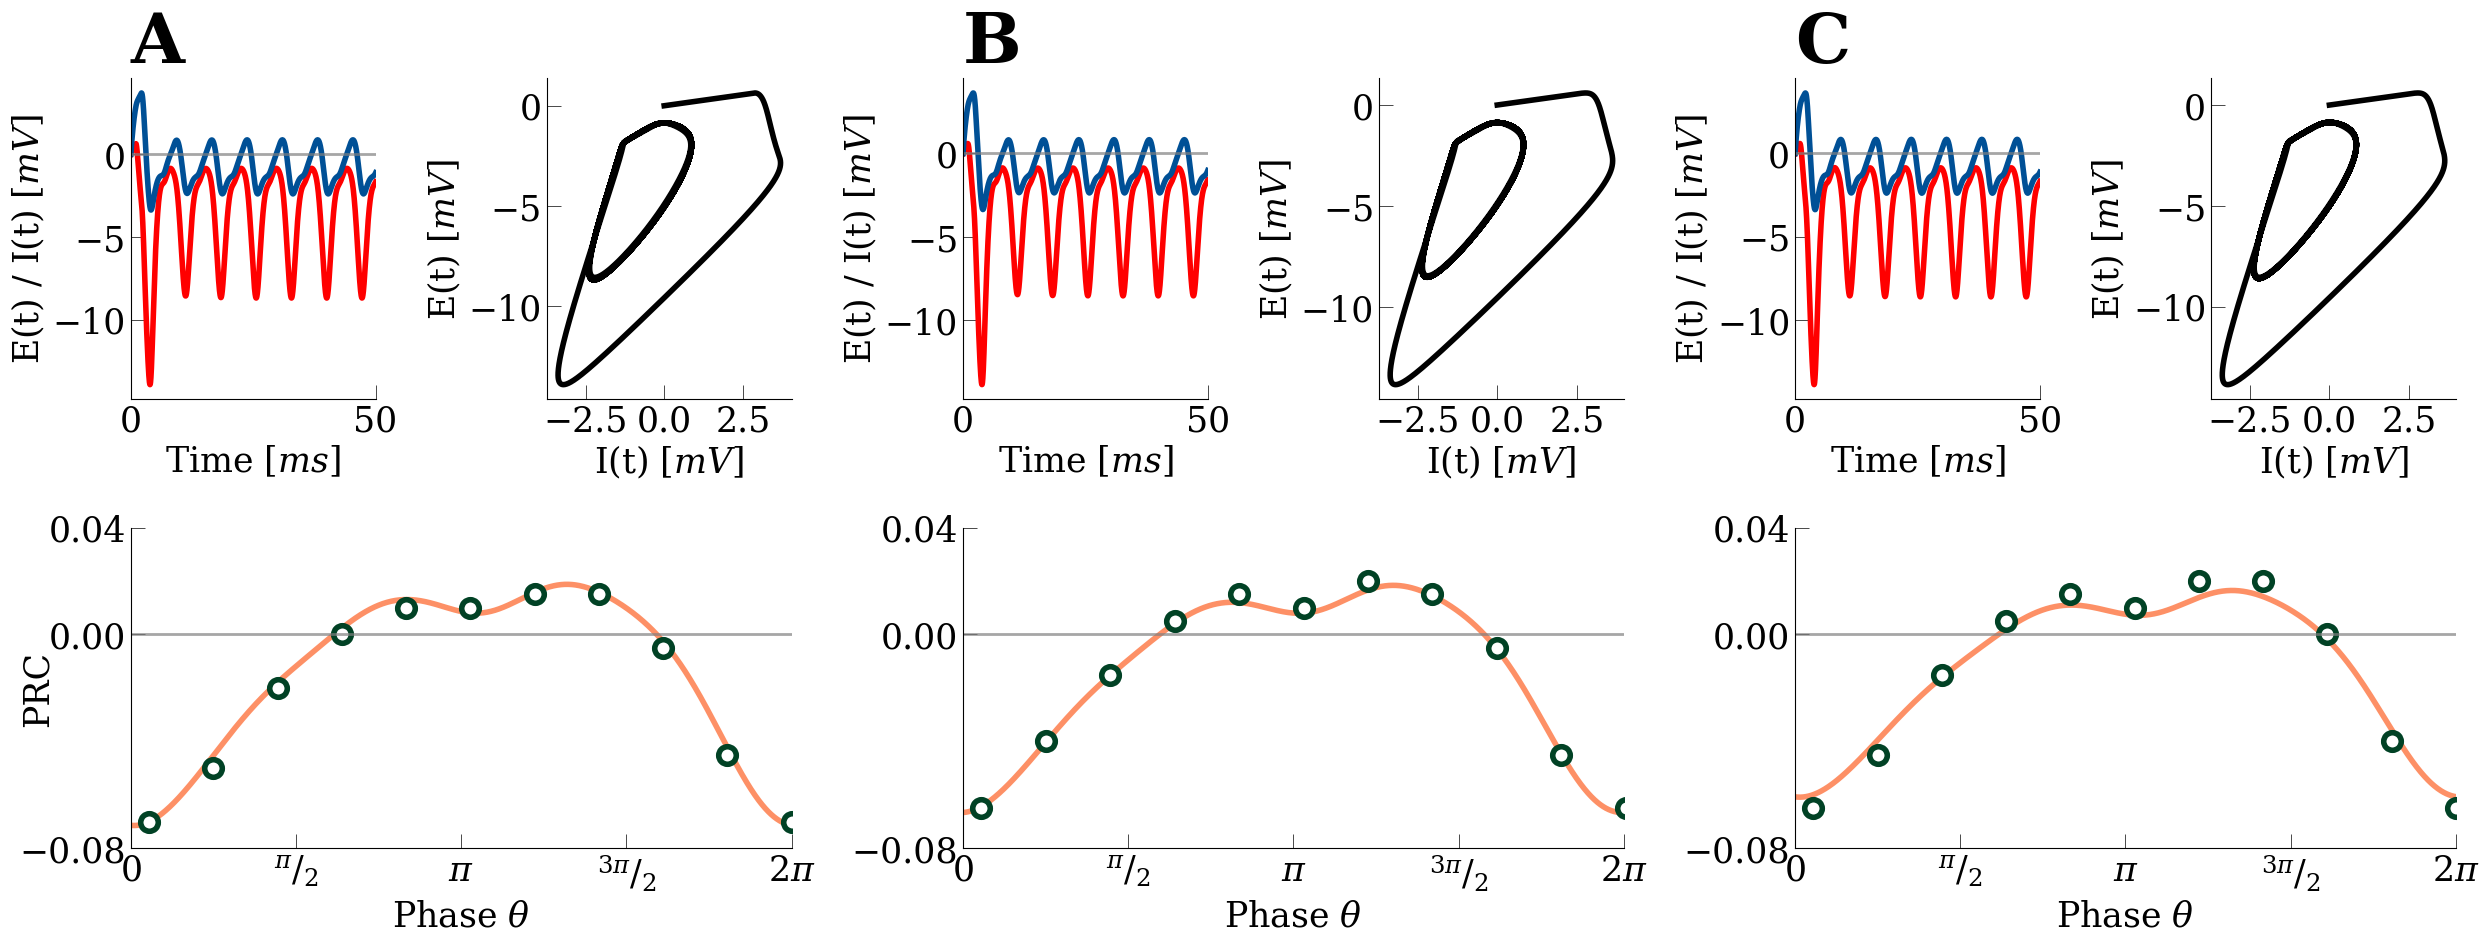

In [3]:
############
### DISCRETE
############

### WCM
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "WCM", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
t_d, EE_d, II_d = data[:,0], data[:,1], data[:,2]

### PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
tt_d, ZE_d, ZI_d = data[:,0], data[:,1], data[:,2]

### DIRECT PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "Direct_PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
impulse_onset_d, phaseshift_d = data[:,0], data[:,1]


### What's the period ?
#######################

peaks_d,_ = find_peaks(EE_d, height = -1)  ### finds all peaks higher than height = xxx

diff_d = np.zeros(len(peaks_d)-1)           ### makes list of zeros

for i in range(len(peaks_d)-1):
    diff_d[i] = peaks_d[i+1] - peaks_d[i]     ### calculates the difference of indices between two peaks

T_d = np.sum(diff_d) * dt / len(diff_d)       ### sums all differences up, multliplies by dt to set into timespace and 
T_d = np.round(T_d,2)

### Match direct with adjoint PRC
#################################

tt_d = tt_d - 0.5
Z_d = np.add(ZE_d,ZI_d) * 0.025

jump_d = 10
impulse_onset_d = impulse_onset_d[::jump_d]
phaseshift_d = phaseshift_d[::jump_d] 

############
### GAUSSIAN
############

### WCM
params = get_params_for_filename(param_keys, globals())
filename = get_filename("gaussian", "WCM", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
t_g, synEE_g, synII_g, EE_g, II_g = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

### PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("gaussian", "PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
tt_g, synEE_g, synII_g, ZE_g, ZI_g = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

### DIRECT PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("gaussian", "Direct_PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
impulse_onset_g, phaseshift_g = data[:,0], data[:,1]

### What's the period ?
#######################

peaks_g,_ = find_peaks(EE_g, height = -1)  ### finds all peaks higher than height = xxx

diff_g = np.zeros(len(peaks_g)-1)           ### makes list of zeros

for i in range(len(peaks_g)-1):
    diff_g[i] = peaks_g[i+1] - peaks_g[i]     ### calculates the difference of indices between two peaks

T_g = np.sum(diff_g) * dt / len(diff_g)       ### sums all differences up, multliplies by dt to set into timespace and 
T_g = np.round(T_g,2)


### Match direct with adjoint PRC
#################################

tt_g = tt_g - 0.5
Z_g = np.add(ZE_g,ZI_g) * 0.028

jump_g = 10
impulse_onset_g = impulse_onset_g[::jump_g]
phaseshift_g = phaseshift_g[::jump_g] 


#############
### LOGNORMAL
#############

### WCM
params = get_params_for_filename(param_keys, globals())
filename = get_filename("lognormal", "WCM", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
t_l, synEE_l, synII_l, EE_l, II_l = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

### PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("lognormal", "PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)      
tt_l, synEE_l, synII_l, ZE_l, ZI_l = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

### DIRECT PRC
params = get_params_for_filename(param_keys, globals())
filename = get_filename("lognormal", "Direct_PRC", **params)
savefile = os.path.join(output_dir, filename)

data = np.load(savefile, allow_pickle=True)
impulse_onset_l, phaseshift_l = data[:,0], data[:,1]


### What's the period ?
#######################

peaks_l,_ = find_peaks(EE_l, height = -1)  ### finds all peaks higher than height = xxx

diff_l = np.zeros(len(peaks_l)-1)           ### makes list of zeros

for i in range(len(peaks_l)-1):
    diff_l[i] = peaks_l[i+1] - peaks_l[i]     ### calculates the difference of indices between two peaks

T_l = np.sum(diff_l) * dt / len(diff_l)       ### sums all differences up, multliplies by dt to set into timespace and 
T_l = np.round(T_l,2)


### Match direct with adjoint PRC
#################################

tt_l = tt_l - 0.5
Z_l = np.add(ZE_l,ZI_l) * 0.02

jump_l = 10
impulse_onset_l = impulse_onset_l[::jump_l]
phaseshift_l = phaseshift_l[::jump_l] 

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)
G = gridspec.GridSpec(2, 6)

ax1 = plt.subplot(G[0,0])
ax2 = plt.subplot(G[0,1])
ax3 = plt.subplot(G[0,2])
ax4 = plt.subplot(G[0,3])
ax5 = plt.subplot(G[0,4])
ax6 = plt.subplot(G[0,5])
ax7 = plt.subplot(G[1,0:2])
ax8 = plt.subplot(G[1,2:4])
ax9 = plt.subplot(G[1,4:6])
#ax10 = plt.subplot(G[2,0:6])

ax1.plot(t_d, EE_d, label = 'EE', color = "#ff0000", linewidth = 4)
ax1.plot(t_d, II_d, label = 'II', color = "#005096", linewidth = 4)
ax1.axhline(c='grey', lw=2, alpha=0.7)
ax1.set_xlim(0,50)
ax1.set_xticks([0,50])
ax1.set_ylabel('E(t) / I(t) $[mV]$')
ax1.set_xlabel(r'Time $[ms]$')

ax2.plot(II_d, EE_d, color = "black", linewidth = 4)
ax2.set_ylabel('E(t) $[mV]$')
ax2.set_xlabel('I(t) $[mV]$')

ax3.plot(t_g, EE_g, label = 'EE', color = "#ff0000", linewidth = 4)
ax3.plot(t_g, II_g, label = 'II', color = "#005096", linewidth = 4)
ax3.axhline(c='grey', lw=2, alpha=0.7)
ax3.set_xlim(0,50)
ax3.set_xticks([0,50])
ax3.set_ylabel('E(t) / I(t) $[mV]$')
ax3.set_xlabel(r'Time $[ms]$')

ax4.plot(II_g, EE_g, color = "black", linewidth = 4)
ax4.set_ylabel('E(t) $[mV]$')
ax4.set_xlabel('I(t) $[mV]$')

ax5.plot(t_l, EE_l, label = 'EE', color = "#ff0000", linewidth = 4)
ax5.plot(t_l, II_l, label = 'II', color = "#005096", linewidth = 4)
ax5.axhline(c='grey', lw=2, alpha=0.7)
ax5.set_xlim(0,50)
ax5.set_xticks([0,50])
ax5.set_ylabel('E(t) / I(t) $[mV]$')
ax5.set_xlabel(r'Time $[ms]$')

ax6.plot(II_l, EE_l, color = "black", linewidth = 4)
ax6.set_ylabel('E(t) $[mV]$')
ax6.set_xlabel('I(t) $[mV]$')

ax7.plot(tt_d, Z_d, label='PRC $Z$, adjoint', color = '#FD4700', zorder=1, linewidth = 4, alpha = 0.6)
ax7.scatter(impulse_onset_d, phaseshift_d, label='PRC $Z$, direct', s=160, facecolors='white', edgecolors= '#014225', linewidths = 4, zorder=2)
ax7.axhline(c='grey', lw=2, alpha=0.7)
ax7.set_xlim(26.8,26.8+T_d)
ax7.set_xticks([26.8, 26.8+(T_d/4), 26.8+(T_d*2/4), 26.8+(T_d*3/4), 26.8+(T_d*4/4)])
ax7.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax7.set_ylim(-0.08, 0.04)
ax7.set_yticks([-0.08, 0, 0.04])
ax7.set_xlabel(r'Phase $\theta$')
ax7.set_ylabel('PRC', labelpad = -25)
#ax7.legend()

ax8.plot(tt_g, Z_g, label='PRC $Z$, adjoint', color = '#FD4700', zorder=1, linewidth = 4, alpha = 0.6)
ax8.scatter(impulse_onset_g, phaseshift_g, label='PRC $Z$, direct', s=160, facecolors='white', edgecolors= '#014225', linewidths = 4, zorder=2)
ax8.axhline(c='grey', lw=2, alpha=0.7)
ax8.set_xlim(26.8,26.8+T_g)
ax8.set_xticks([26.8, 26.8+(T_g/4), 26.8+(T_g*2/4), 26.8+(T_g*3/4), 26.8+(T_g*4/4)])
ax8.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax8.set_ylim(-0.08, 0.04)
ax8.set_yticks([-0.08, 0, 0.04])
ax8.set_xlabel(r'Phase $\theta$')
#ax8.set_ylabel('PRC')
#ax8.legend()

ax9.plot(tt_l, Z_l, label='PRC $Z$, adjoint', color = '#FD4700', zorder=1, linewidth = 4, alpha = 0.6)
ax9.scatter(impulse_onset_l, phaseshift_l, label='PRC $Z$, direct', s=160, facecolors='white', edgecolors= '#014225', linewidths = 4, zorder=2)
#ax9.scatter(impulse_onset_l_z, phaseshift_l_z, s=160, facecolors='white', edgecolors= '#014225', linewidths = 4, zorder=2)
ax9.axhline(c='grey', lw=2, alpha=0.7)
ax9.set_xlim(26.8,26.8+T_l)
ax9.set_xticks([26.8, 26.8+(T_l/4), 26.8+(T_l*2/4), 26.8+(T_l*3/4), 26.8+(T_l*4/4)])
ax9.set_xticklabels(('$0$', '$^{\pi}/_{2}$', '$\pi$', '$^{3\pi}/_{2}$', '$2\pi$'))
ax9.set_ylim(-0.08, 0.04)
ax9.set_yticks([-0.08, 0, 0.04])
ax9.set_xlabel(r'Phase $\theta$')
#ax9.set_ylabel('PRC')
#ax9.legend()

ax1.annotate('A', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")
ax3.annotate('B', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")
ax5.annotate('C', xy=(0,1.05), xycoords='axes fraction', fontsize = 50, weight = "bold")

plt.savefig("../figures/fig3.pdf", bbox_inches="tight")  # Save the figure in /figures/
plt.show()